In [18]:
import pandas as pd
df=pd.read_csv("FeedbackAnalysis.csv")
df.head()

,StudentID,Subject Expertise,Clarity of Explanation,Presentation Quality,Assignment Difficulty,Doubt Resolution,Course Structure,Student Support,Course Relevance,Comments
0,340,5,2,7,6,9,2,1,8,Excellent and provides best exposure to students.
1,253,6,5,8,6,2,1,2,9,Good
2,680,7,7,6,5,4,2,3,1,Events also help students to divert their mind...
3,806,9,6,7,1,5,9,4,6,Complete wastage of time. Again this opinion i...
4,632,8,10,8,4,6,6,9,9,The event was well organized and the sessions ...


/tmp/ipython-input-2372261304.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


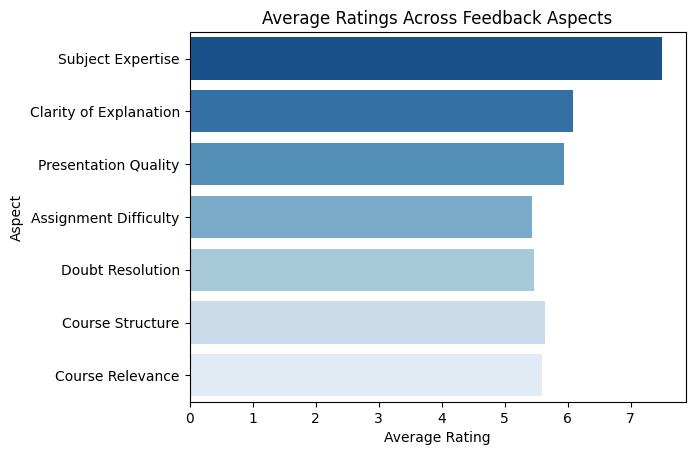

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

rating_cols = [
    'Subject Expertise',
    'Clarity of Explanation',
    'Presentation Quality',
    'Assignment Difficulty',
    'Doubt Resolution',
    'Course Structure',
    'Course Relevance'
]

avg_ratings = df[rating_cols].mean().reset_index()
avg_ratings.columns = ['Aspect', 'Average Rating']

sns.barplot(
    x='Average Rating',
    y='Aspect',
    data=avg_ratings,
    palette='Blues_r'
)

plt.title("Average Ratings Across Feedback Aspects")
plt.xlabel("Average Rating")
plt.ylabel("Aspect")
plt.show()

/tmp/ipython-input-175271756.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


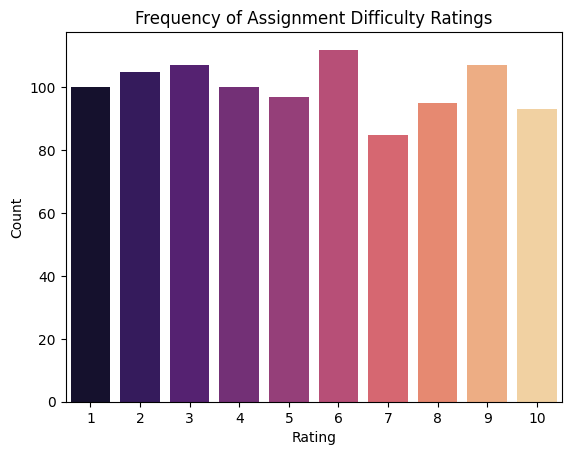

In [39]:
sns.countplot(
    x='Assignment Difficulty',
    data=df,
    palette='magma'
)

plt.title("Frequency of Assignment Difficulty Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [19]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize analyzer
sia = SentimentIntensityAnalyzer()

# Sentiment score from comments
df['sentiment_score'] = df['Comments'].apply(
    lambda x: sia.polarity_scores(str(x))['compound']
)

# Convert score to label
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['sentiment_score'].apply(label_sentiment)

# View result
df[['Comments', 'Sentiment', 'sentiment_score']].head()

# Overall sentiment count
df['Sentiment'].value_counts()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,count
Sentiment,
Positive,808
Neutral,128
Negative,65


In [ ]:
neg = df[df['Sentiment'] == 'Negative']['Comments']
neg.head(10)

,Comments
7,No idea.
70,Time management was weak
73,No comments.
74,The activities are very good but no time is gi...
83,Not much interested
113,Poor
114,Poor time management
126,The sessions were boring
130,Lack of real world examples
163,The venue arrangement was not comfortable.


In [21]:
df.groupby('Sentiment')[[
    'Subject Expertise',
    'Clarity of Explanation',
    'Assignment Difficulty',
    'Course Structure'
]].mean()

,Subject Expertise,Clarity of Explanation,Assignment Difficulty,Course Structure
Sentiment,,,,
Negative,7.446154,6.030769,5.307692,5.415385
Neutral,7.421875,6.164062,5.687500,5.515625
Positive,7.513614,6.073020,5.399752,5.673267


/tmp/ipython-input-1993055298.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette=palette)


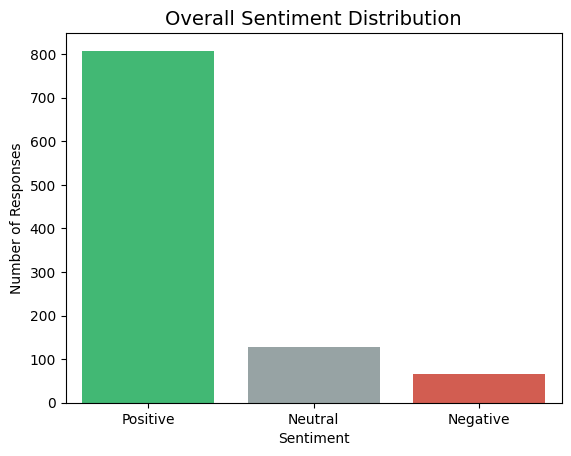

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {
    'Positive': '#2ecc71',   # green
    'Neutral':  '#95a5a6',   # gray
    'Negative': '#e74c3c'    # red
}

sns.countplot(x='Sentiment', data=df, palette=palette)
plt.title("Overall Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Responses")
plt.show()

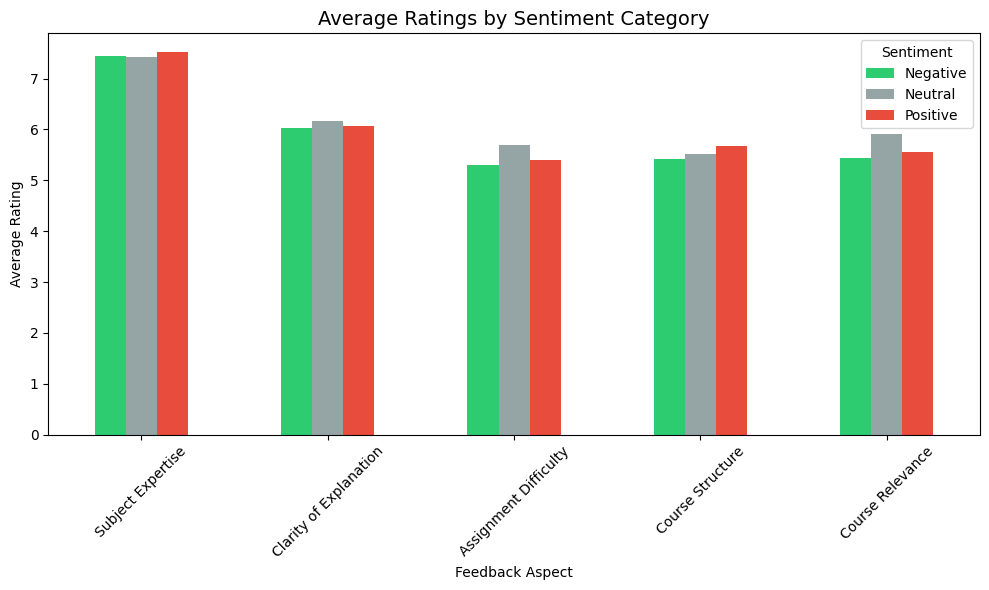

In [28]:
avg_by_sentiment = df.groupby('Sentiment')[[
    'Subject Expertise',
    'Clarity of Explanation',
    'Assignment Difficulty',
    'Course Structure',
    'Course Relevance'
]].mean()

avg_by_sentiment.T.plot(
    kind='bar',
    figsize=(10,6),
    color=['#2ecc71', '#95a5a6', '#e74c3c']
)

plt.title("Average Ratings by Sentiment Category", fontsize=14)
plt.xlabel("Feedback Aspect")
plt.ylabel("Average Rating")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1297545558.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


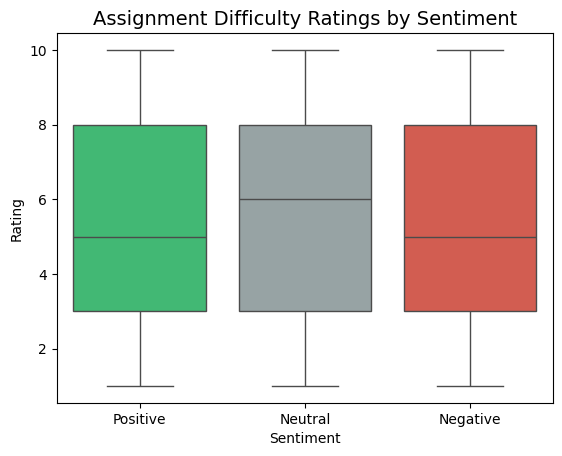

In [30]:
sns.boxplot(
    x='Sentiment',
    y='Assignment Difficulty',
    data=df,
    palette=palette
)

plt.title("Assignment Difficulty Ratings by Sentiment", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()

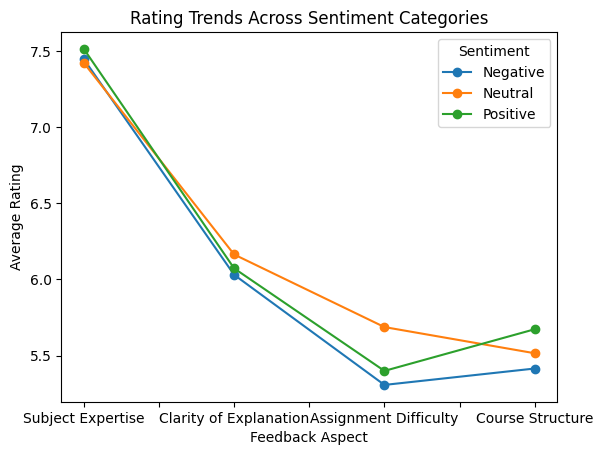

In [36]:
mean_scores = df.groupby('Sentiment')[[
    'Subject Expertise',
    'Clarity of Explanation',
    'Assignment Difficulty',
    'Course Structure'
]].mean().T

mean_scores.plot(marker='o')
plt.title("Rating Trends Across Sentiment Categories")
plt.xlabel("Feedback Aspect")
plt.ylabel("Average Rating")
plt.show()

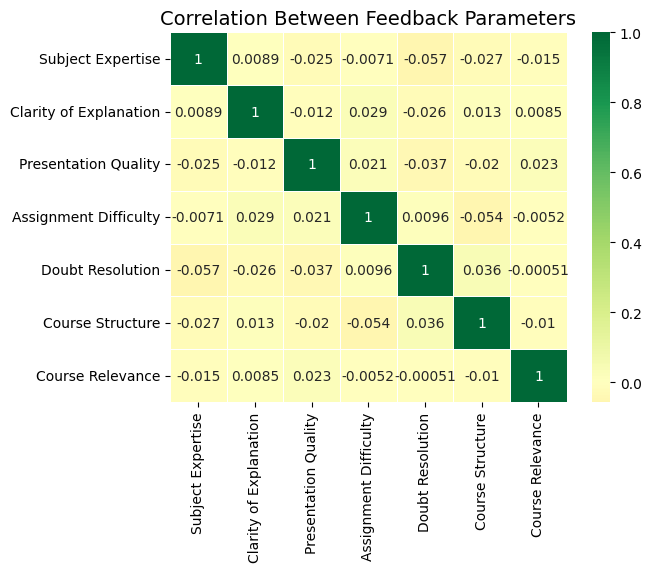

In [37]:
corr = df[[
    'Subject Expertise',
    'Clarity of Explanation',
    'Presentation Quality',
    'Assignment Difficulty',
    'Doubt Resolution',
    'Course Structure',
    'Course Relevance'
]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='RdYlGn',
    center=0,
    linewidths=0.5
)

plt.title("Correlation Between Feedback Parameters", fontsize=14)
plt.show()